In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall


In [2]:
dataset = pd.read_csv("obesity.csv")
print("Classes in the dataset:", dataset['NObeyesdad'].unique())

Classes in the dataset: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


##One hot encoding + Scaling Data

In [3]:
categories = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
for c in categories:
  dummies = pd.get_dummies(dataset[c], prefix=(str(c)+"_"))
  dataset = pd.concat([dataset, dummies], axis=1)
dataset = dataset.drop(columns=categories)

In [4]:
d = ['NObeyesdad__Insufficient_Weight',
       'NObeyesdad__Normal_Weight', 'NObeyesdad__Obesity_Type_I',
       'NObeyesdad__Obesity_Type_II', 'NObeyesdad__Obesity_Type_III',
       'NObeyesdad__Overweight_Level_I', 'NObeyesdad__Overweight_Level_II']
X = dataset.drop(columns=d)
y = dataset[d]

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

In [6]:
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.2, random_state=15)

Model with using only Dropout Techniques

Epoch 1/100
85/85 [==============================] - 1s 2ms/step - loss: 1.9185 - accuracy: 0.2091 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 1.7366 - accuracy: 0.3246 - precision: 0.5862 - recall: 0.0101
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 1.5585 - accuracy: 0.4129 - precision: 0.7385 - recall: 0.0853
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 1.4529 - accuracy: 0.4414 - precision: 0.6808 - recall: 0.1428
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 1.3659 - accuracy: 0.4650 - precision: 0.7233 - recall: 0.2044
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 1.2721 - accuracy: 0.4917 - precision: 0.7586 - recall: 0.2494
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 1.2372 - accuracy: 0.5071 - precision: 0.7333 - recall: 0.2607
Epoch 8/100
85/85 [=====================

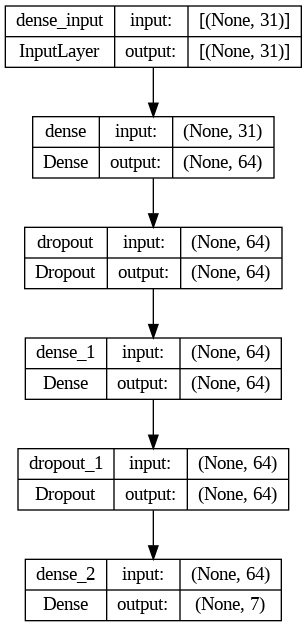

In [7]:
#Neural Network
def createModel():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim = 31))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
  return model
model = createModel()
h = model.fit(data_train, class_train, epochs=100, batch_size=20)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(data_test, class_test, verbose=0)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_acc)
print('Testing Precision:', test_precision)
print('Testing Recall:', test_recall)

Testing Loss: 0.32240453362464905
Testing Accuracy: 0.9078013896942139
Testing Precision: 0.9134615659713745
Testing Recall: 0.8983451724052429


In [9]:
train_loss, train_acc, train_precision, train_recall = model.evaluate(data_train, class_train, verbose=0)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)
print('Training Precision:', train_precision)
print('Training Recall:', train_recall)

Training Loss: 0.1302032321691513
Training Accuracy: 0.9727488160133362
Training Precision: 0.9755223989486694
Training Recall: 0.9680094718933105


After applying the Dropout technique for 50% of the neurons to stabilize the training process, the testing accuracy is 90.78% compared to the training accuracy of 97.27% which is still solid as it performs well on unseen data.



In [10]:
dataset_copy = pd.read_csv("obesity.csv")

Cross - Validation for the DNN

In [13]:
#Cross Validation for DNN - https://stackoverflow.com/questions/48085182/cross-validation-in-keras
from sklearn.model_selection import StratifiedKFold
def train_evaluate(model, xtrain, ytrain, xtest, ytest):
  model.fit(data_train, class_train, epochs=100, batch_size=20)
  test_loss, test_acc, test_precision, test_recall = model.evaluate(data_test, class_test, verbose=0)
  return test_loss, test_acc, test_precision, test_recall
kFold = StratifiedKFold(n_splits = 10)
i=0
sum=0
temp = dataset_copy["NObeyesdad"]
losses = []
accuracies = []
precisions = []
recalls = []
for train, test in kFold.split(X,temp):
  print()
  model = None
  model = createModel()
  loss, acc, prec, rec = train_evaluate(model,X.iloc[[train[0]]],y.iloc[[train[0]]],X.iloc[[test[0]]],y.iloc[[test[0]]])
  losses.append(loss)
  accuracies.append(acc)
  precisions.append(prec)
  recalls.append(rec)
  i+=1
  sum += acc

print("Mean accuracy:", (sum/i))


Epoch 1/100
85/85 [==============================] - 1s 2ms/step - loss: 1.9369 - accuracy: 0.1985 - precision_11: 0.2000 - recall_11: 5.9242e-04
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 1.7414 - accuracy: 0.3389 - precision_11: 0.9062 - recall_11: 0.0344
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 1.5394 - accuracy: 0.4218 - precision_11: 0.8127 - recall_11: 0.1209
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 1.4250 - accuracy: 0.4538 - precision_11: 0.7367 - recall_11: 0.1724
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 1.3358 - accuracy: 0.4645 - precision_11: 0.7474 - recall_11: 0.2121
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 1.2648 - accuracy: 0.5036 - precision_11: 0.7277 - recall_11: 0.2565
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 1.2211 - accuracy: 0.5166 - precision_11: 0.7594 - recall_11: 0.2636
E

In [14]:
print(losses)
print(accuracies)
print(precisions)
print(recalls)

[0.2839702367782593, 0.2801053822040558, 0.27766427397727966, 0.31362611055374146, 0.2942993938922882, 0.2724241018295288, 0.2635343074798584, 0.28404098749160767, 0.2776341438293457, 0.2649690508842468]
[0.9101654887199402, 0.9078013896942139, 0.9125295281410217, 0.9267139434814453, 0.9078013896942139, 0.9219858050346375, 0.914893627166748, 0.9101654887199402, 0.9338061213493347, 0.9314420819282532]
[0.9204819202423096, 0.9164677858352661, 0.9144893288612366, 0.9282296895980835, 0.9158653616905212, 0.9347826242446899, 0.9277108311653137, 0.9121140241622925, 0.9399038553237915, 0.9377990365028381]
[0.9030733108520508, 0.9078013896942139, 0.9101654887199402, 0.9172576665878296, 0.9007092118263245, 0.914893627166748, 0.9101654887199402, 0.9078013896942139, 0.9243499040603638, 0.9267139434814453]


After running Cross-Validation on the model with dropout, the mean accuracy was 91.8% which is good and it performs well in all of the folds.